# Statistics Reference Part 1

## Table of Contents:
* [Types of Skew](#skew)
* [Variance](#Variance)
* [Standard Deviation](#Standard Deviation)
* [Coefficient of Variation](#Coefficient of Variation)
* [Comparing Variance, Standard Deviation and Coefficient of Variation](#comp)

| <h3>Population (N)</h3> | <h3>Sample (n)</h3>
| :--------------------------------- | :-
| Collection of all items of interest in the study | A subset of the poulation
| Paramaters | Statistics

## Types of Skew <a class="anchor" id="skew"></a>

Text(0.5,1,'Left Skewed')

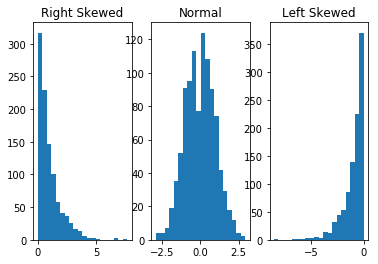

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

right_skewed = np.random.exponential(size = 1000)
normal_skewed = np.random.normal(size=1000)
left_skewed = -np.random.exponential(size=1000)


# plot both together to compare
fig, ax=plt.subplots(1,3)
ax[0].hist(right_skewed, bins=20)
ax[0].set_title("Right Skewed")
ax[1].hist(normal_skewed, bins=20)
ax[1].set_title("Normal")
ax[2].hist(left_skewed, bins=20)
ax[2].set_title("Left Skewed")

## Variance <a class="anchor" id="Variance"></a>

 - measures the dispersion of a set of data points around their mean.



\begin{align}
\textbf{Population Variance} && \textbf{Sample Variance} \\
               \sigma^2 = \frac{\sum_{i=1}^N (x_i-\mu)^2}{N} &&
               S^2 = \frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n-1}
\end{align}


In [136]:
def getVariance(data, isSample = False):
    """ Paramaters: 
            - np.array, contains the data
            - isSample, determants to calculate sample or population variance
        Returns: Variance"""
    
    mean = data.mean()
    numerator = 0
    
    for num in data:
        numerator += (num - mean)**2
    
    if isSample:
        variance = numerator/data.size - 1
    else :
        variance = numerator/data.size
    
    return variance

In [137]:
variance = getVariance(right_skewed)
print("Variance:",variance)

Variance: 0.9539084032127366


### Standard Deviation <a class="anchor" id="Standard Deviation"></a>

\begin{align}
\textbf{Population Standard Deviation} && \textbf{Sample Standard Deviation} \\
               \sigma = \sqrt{\sigma^2} &&
               S = \sqrt{S^2}
\end{align}

In [138]:
standard_deviation = np.sqrt(getVariance(right_skewed)
print("Standard Deviation:",standard_deviation)

SyntaxError: invalid syntax (<ipython-input-138-280bf782d1f4>, line 2)

### Coefficient of Variation  <a class="anchor" id="Coefficient of Variation"></a>

- Reletive Standart Deviation

\begin{align}
\textbf{Population Standard Deviation} && \textbf{Sample Standard Deviation} \\
               C_v = \frac{\sigma}{\mu} &&
               \hat{C_v} = \frac{S}{\bar{x}}
\end{align}

In [139]:
coefficient_of_variation = np.sqrt(getVariance(right_skewed))/right_skewed.mean()
print("Coefficient of Variation :",coefficient_of_variation)

Coefficient of Variation : 0.9993901452747052


### Comparing Variance, Standard Deviation and Coefficient of Variation <a class="anchor" id="comp"></a>

#### Pizza Slice Price in New York

In [140]:
store = np.arange(10) + 1
dollor = np.random.uniform(low=2, high=7, size=(10,))
peso = dollor * 18.18
data = np.concatenate(([store], [dollor], [peso]), axis = 0)

In [141]:
print (pd.DataFrame(np.round(data.T,2), columns=['Store',"Dollor","Peso"]))

   Store  Dollor    Peso
0    1.0    3.34   60.79
1    2.0    3.39   61.60
2    3.0    3.82   69.51
3    4.0    6.49  117.96
4    5.0    4.90   89.05
5    6.0    4.95   90.03
6    7.0    5.53  100.60
7    8.0    3.01   54.66
8    9.0    5.42   98.48
9   10.0    6.11  111.17


In [146]:
means = np.array([dollor.mean(),peso.mean()])
variances = np.array([getVariance(dollor),getVariance(peso)])
standard_deviations = np.sqrt(variances)
coefficient_of_variation = np.array([standard_deviations[0]/dollor.mean(), standard_deviations[1]/peso.mean()])

comp = np.concatenate(([means], [variances], [standard_deviations], [coefficient_of_variation]), axis = 0)

print(pd.DataFrame(np.round(comp,2), columns=["Dollor","Peso"], index=['Mean','Variation','Standard Deviation','Coefficient of Variation']))
print("\n*Notice how the coefficient of Variation are the same value between dollors and pesos.")

                          Dollor    Peso
Mean                        4.70   85.38
Variation                   1.37  453.00
Standard Deviation          1.17   21.28
Coefficient of Variation    0.25    0.25

*Notice how the coefficient of Variation are the same value between dollors and pesos.
